# NBA Shot Chart

Siddarth Puliyanda

Take the input of NBA player's name and output his shot chart for the given season!

In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import json
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import warnings
warnings.filterwarnings('ignore')

/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from nba_api.stats.endpoints import shotchartdetail

#Pull all shot attempts for the season
response = shotchartdetail.ShotChartDetail(team_id=0,
    player_id=0,
    season_nullable='2022-23', #Change season
    season_type_all_star='Regular Season',
    context_measure_simple = 'FGA'
)

content = json.loads(response.get_json())

results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows,columns= headers)

df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200001,7,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,11,38,Missed Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,12,-118,50,1,0,20221018,BOS,PHI
1,Shot Chart Detail,0022200001,11,203935,Marcus Smart,1610612738,Boston Celtics,1,11,15,Made Shot,Driving Floating Bank Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,120,55,1,1,20221018,BOS,PHI
2,Shot Chart Detail,0022200001,12,202699,Tobias Harris,1610612755,Philadelphia 76ers,1,11,5,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,50,135,1,0,20221018,BOS,PHI
3,Shot Chart Detail,0022200001,14,202699,Tobias Harris,1610612755,Philadelphia 76ers,1,11,3,Made Shot,Tip Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20221018,BOS,PHI
4,Shot Chart Detail,0022200001,15,1628369,Jayson Tatum,1610612738,Boston Celtics,1,10,46,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-232,49,1,1,20221018,BOS,PHI


In [3]:
def get_player_shots(name):
    data = df[df['PLAYER_NAME'] == name] #Pull the data out of the DataFrame
    n_players = data['PLAYER_ID'].nunique() #Check number of unique players in the data
    
    if n_players == 0:
        return 'DataFrame is empty, check spelling'
    
    if n_players == 1:
        return data
    
    if n_players > 1:
        print ('DataFrame has multiple player ids')
        return data
    
#Check if works with Steph
curry = get_player_shots('Stephen Curry')
curry

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
178,Shot Chart Detail,0022200002,61,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,27,Missed Shot,Driving Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,60,10,1,0,20221018,GSW,LAL
179,Shot Chart Detail,0022200002,64,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,22,Made Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,16,150,79,1,1,20221018,GSW,LAL
180,Shot Chart Detail,0022200002,68,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,7,273,1,0,20221018,GSW,LAL
187,Shot Chart Detail,0022200002,102,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,16,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-151,197,1,0,20221018,GSW,LAL
193,Shot Chart Detail,0022200002,132,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,52,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-81,229,1,0,20221018,GSW,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191426,Shot Chart Detail,0022201086,526,201939,Stephen Curry,1610612744,Golden State Warriors,4,9,59,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,20,58,1,1,20230322,DAL,GSW
191428,Shot Chart Detail,0022201086,544,201939,Stephen Curry,1610612744,Golden State Warriors,4,9,27,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,212,143,1,1,20230322,DAL,GSW
191430,Shot Chart Detail,0022201086,553,201939,Stephen Curry,1610612744,Golden State Warriors,4,8,46,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,235,88,1,0,20230322,DAL,GSW
191446,Shot Chart Detail,0022201086,600,201939,Stephen Curry,1610612744,Golden State Warriors,4,5,1,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-178,177,1,0,20230322,DAL,GSW


In [4]:
#Create a basketball court diagram
#Code found on Github
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Drawing the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint:
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

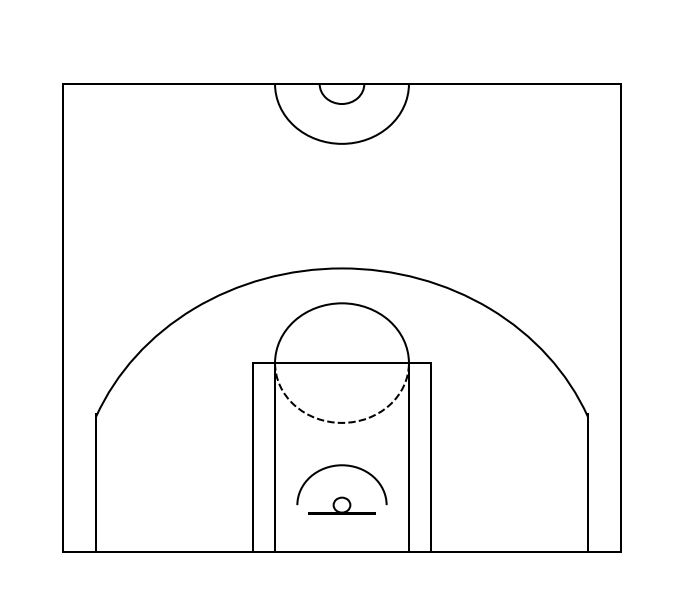

In [5]:
#Display court
plt.figure(figsize=(12,11))
draw_court(outer_lines=True, color="black")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.axis('off')

plt.show()

In [6]:
#Add player's image to the court, searched by player ID
def get_player_img(player_id):
    url = "https://cdn.nba.com/headshots/nba/latest/1040x760/"+str(player_id)+".png"
    img_file = str(player_id) + ".png"
    img = plt.imread(urllib.request.urlretrieve(url, img_file)[0])
    
    return plt.imshow(img,extent=[-250, -135, 300, 400])

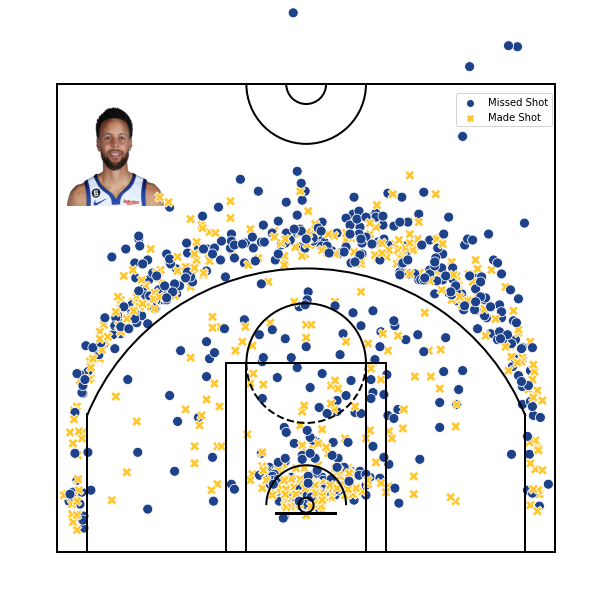

In [7]:
#Create shot chart for Steph Curry
def player_shot_chart(df, last=None):
    plt.figure(figsize=(12,11)) #Initializing figure

    get_player_img(df['PLAYER_ID'].unique()[0]) #Add player image by grabbing his PLAYER_ID from the DataFrame

    draw_court(outer_lines=True, color="black") #draw blank court

    sns.scatterplot(x='LOC_X', y='LOC_Y', #Populate with player shots
                    data=df[last:], #Last x amount of shots, input must be negative 
                    hue='EVENT_TYPE', 
                    style = 'EVENT_TYPE',
                    palette=["#1D428A", "#FFC72C"], 
                    s = 100)

    plt.xlim(-300,300)
    plt.ylim(-100,500)
    plt.axis('off')
    plt.legend(loc=[.75,.8])

    plt.show()


player_shot_chart(curry)

In [8]:
#Input player name to retrieve player shot chart
def main():
    name = input("Player: ")
    df = get_player_shots(name)
    player_shot_chart(df,-100) #Input a negative variable to show last X amount of shots (ex. -100 -> last 100 shots)

Player: James Harden


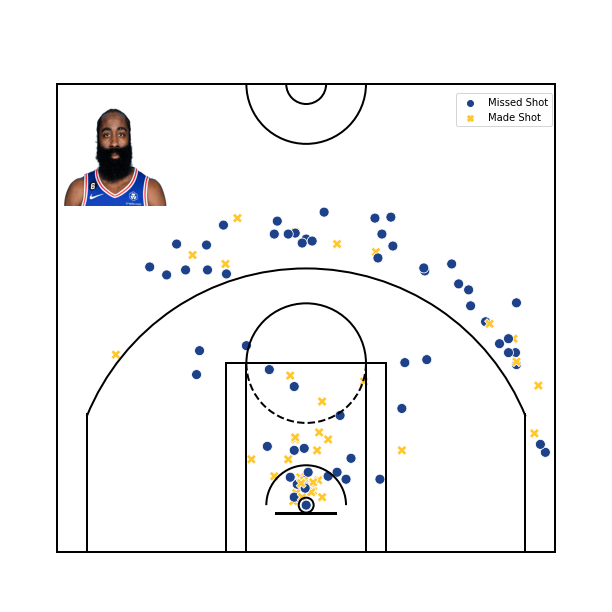

In [9]:
#Run function!
main()